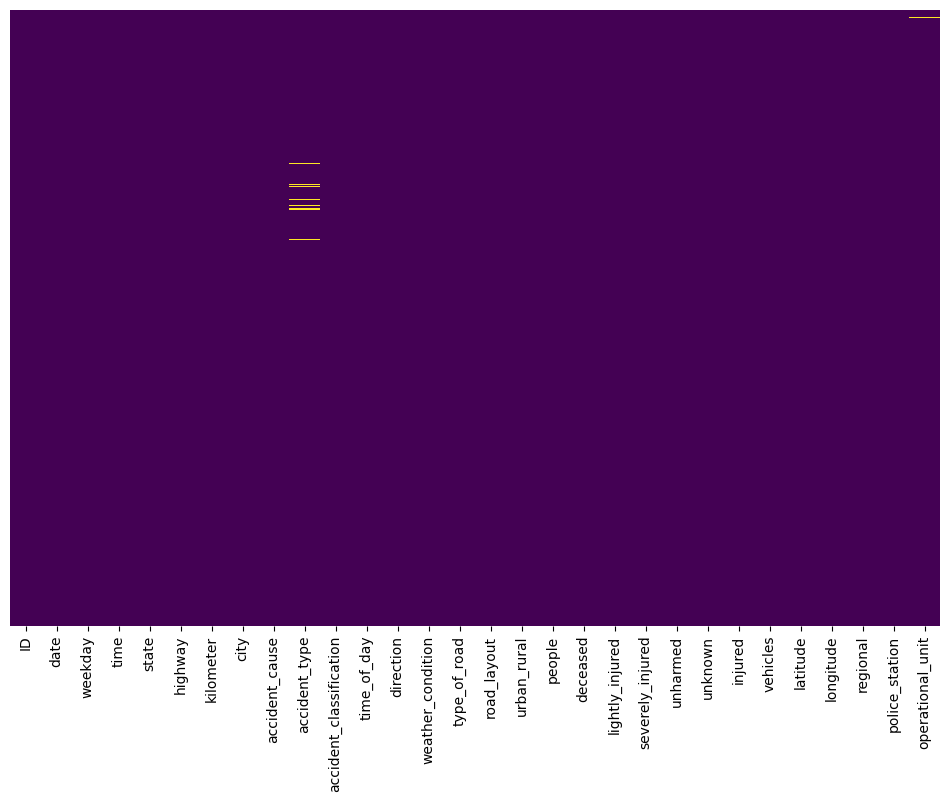

ID                           date       highway  \
count   64539.000000                          64539  64372.000000   
mean   369745.487194  2021-07-04 19:32:21.988564736    210.660163   
min    331693.000000            2021-01-01 00:00:00     10.000000   
25%    351095.500000            2021-04-06 00:00:00    101.000000   
50%    369790.000000            2021-07-07 00:00:00    158.000000   
75%    388100.500000            2021-10-03 00:00:00    324.000000   
max    465993.000000            2021-12-31 00:00:00    495.000000   
std     21954.249547                            NaN    130.673217   

             people      deceased  lightly_injured  severely_injured  \
count  64539.000000  64539.000000     64539.000000      64539.000000   
mean       2.338508      0.083608         0.839508          0.273710   
min        1.000000      0.000000         0.000000          0.000000   
25%        1.000000      0.000000         0.000000          0.000000   
50%        2.000000      0.000000         1.000000          0.000000   
75%        3.000000      0.000000         1.000000          0.000000   
max       70.000000     19.000000        44.000000         26.000000   
std        1.866810      0.340734         1.029122          0.612703   

           unharmed       unknown       injured      vehicles  
count  64539.000000  64539.000000  64539.000000  64539.000000  
mean       0.981639      0.160043      1.113218      1.653791  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      1.000000      1.000000  
50%        1.000000      0.000000      1.000000      2.000000  
75%        1.000000      0.000000      1.000000      2.000000  
max       53.000000     42.000000     49.000000     14.000000  
std        1.440071      0.473669      1.151550      0.721653

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


data = pd.read_csv('Dados_PRF_2022_translated.csv', delimiter=';')

# Display the first few rows of the dataset

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()



# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

data.describe()

In [37]:
# 1. Time-based Analysis
data['hour'] = data['time'].str.split(':').str[0].astype(int)

# For fig1
accidents_per_day = data.groupby('date').size().reset_index(name='count')
fig1 = px.line(accidents_per_day, x='date', y='count', title='Number of Accidents per Day', labels={'count':'Number of Accidents'})
plt.show()

# For fig2
weekday_counts = data['weekday'].value_counts().reset_index(name='count').rename(columns={'index':'weekday'})
fig2 = px.bar(weekday_counts, x='weekday', y='count', title='Number of Accidents per Weekday', labels={'weekday':'Weekday', 'count':'Number of Accidents'})
plt.show()

# For fig3
fig3 = px.histogram(data, x='hour', title='Number of Accidents by Hour of Day', labels={'hour':'Hour of the Day'})


fig1.show()
fig2.show()
fig3.show()


C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
# 2. Location-based Analysis
state_counts = data['state'].value_counts().reset_index(name='count').rename(columns={'index':'state'})
fig4 = px.bar(state_counts, x='state', y='count', title='Number of Accidents by State', labels={'state':'State', 'count':'Number of Accidents'})

city_counts = data['city'].value_counts().head(10).reset_index(name='count').rename(columns={'index':'city'})
fig5 = px.bar(city_counts, x='city', y='count', title='Top 10 Cities with Highest Number of Accidents', labels={'city':'City', 'count':'Number of Accidents'})

fig4.show()
fig5.show()


In [39]:
# 3. Accident Details Analysis
cause_counts = data['accident_cause'].value_counts().reset_index(name='count').rename(columns={'index':'accident_cause'})
fig6 = px.bar(cause_counts, x='accident_cause', y='count', title='Distribution of Accident Causes', labels={'accident_cause':'Accident Cause', 'count':'Number of Accidents'})

type_counts = data['accident_type'].value_counts().reset_index(name='count').rename(columns={'index':'accident_type'})
fig7 = px.bar(type_counts, x='accident_type', y='count', title='Distribution of Accident Types', labels={'accident_type':'Accident Type', 'count':'Number of Accidents'})

weather_counts = data['weather_condition'].value_counts().reset_index(name='count').rename(columns={'index':'weather_condition'})
fig8 = px.bar(weather_counts, x='weather_condition', y='count', title='Distribution of Weather Conditions During Accidents', labels={'weather_condition':'Weather Condition', 'count':'Number of Accidents'})

road_type_counts = data['type_of_road'].value_counts().reset_index(name='count').rename(columns={'index':'type_of_road'})
fig9 = px.bar(road_type_counts, x='type_of_road', y='count', title='Distribution of Road Types Where Accidents Occurred', labels={'type_of_road':'Type of Road', 'count':'Number of Accidents'})

fig6.show()
fig7.show()
fig8.show()
fig9.show()


In [40]:
# 4. Casualty Analysis
deceased_trend = data.groupby('date')['deceased'].sum().reset_index(name='deceased')
fig10 = px.line(deceased_trend, x='date', y='deceased', title='Trend of Total Deceased Over Time', labels={'date':'Date', 'deceased':'Number of Deceased'})

data['total_injured'] = data['lightly_injured'] + data['severely_injured']
injured_trend = data.groupby('date')['total_injured'].sum().reset_index(name='total_injured')
fig11 = px.line(injured_trend, x='date', y='total_injured', title='Trend of Total Injured Over Time', labels={'date':'Date', 'total_injured':'Number of Injured'})

fig10.show()
fig11.show()


C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [46]:
# Import necessary graph objects from plotly
import plotly.graph_objs as go

data['latitude'] = pd.to_numeric(data['latitude'].astype(str).str.replace(',', '.'), errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'].astype(str).str.replace(',', '.'), errors='coerce')

# Filter out the out-of-range latitude values
data = data[(data['latitude'] <= -5) & (data['latitude'] >= -34)].dropna(subset=['latitude', 'longitude'])




In [48]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the data
@st.cache
def load_data():
    data = pd.read_csv("Dados_PRF_2022_translated.csv", delimiter=';')
    return data

df = load_data()

# Title and introduction
st.title("Brazil Traffic Data Dashboard for 2022")
st.write("This dashboard provides insights into the traffic data of Brazil for the year 2022.")

# Data Overview
st.subheader('Data Overview')
st.write(f"Total Accidents: {len(df)}")
st.write(f"Total Deceased: {df['deceased'].sum()}")
st.write(f"Total Injured: {df['injured'].sum()}")

# Filtering
state = st.multiselect("Select State(s)", df['state'].unique())
if state:
    df = df[df['state'].isin(state)]

# Display raw data on request
if st.checkbox('Show raw data'):
    st.subheader('Raw data')
    st.write(df)

# Visualizations
st.subheader('Number of Accidents per State')
fig, ax = plt.subplots()
df['state'].value_counts().plot(kind='bar', ax=ax)
st.pyplot(fig)

st.subheader('Distribution of Accidents based on Accident Cause')
fig, ax = plt.subplots()
df['accident_cause'].value_counts().plot(kind='bar', ax=ax)
st.pyplot(fig)

st.subheader('Distribution of Accidents based on Weekday')
fig, ax = plt.subplots()
df['weekday'].value_counts().plot(kind='bar', ax=ax)
st.pyplot(fig)

# Map visualization using Plotly
# Map the accident types to numeric values
unique_accident_types = df['accident_type'].unique()
accident_type_mapping = {accident_type: index for index, accident_type in enumerate(unique_accident_types)}
df['accident_type_numeric'] = df['accident_type'].map(accident_type_mapping)

# Create a Mapbox scatter plot with markers colored based on mapped accident type values
fig99 = go.Figure(go.Scattermapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=5,
            color=df['accident_type_numeric'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(tickvals=list(accident_type_mapping.values()), 
                          ticktext=list(accident_type_mapping.keys()))
        ),
        text=df['city'] + '<br>' + df['accident_type'],
    ))

fig99.update_layout(
    title='Accidents in Brazil Based on Latitude and Longitude (Colored by Accident Type)',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=None,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=-10,
            lon=-55
        ),
        pitch=0,
        zoom=3,
        style='open-street-map'
    ),
)

st.plotly_chart(fig99)


C:\Users\boetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

